In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
import os
import random

mpl.rc('image', cmap='gray_r')

In [137]:
# Transformation matrices
P = np.array([[0, 0, 0, 1],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])
Pstar = np.array([[0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [1, 0, 0, 0]])


In [138]:
# real image
Mreal = np.array([[0, 0, 0, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0]])
Mreal = np.ones((4,4)) - Mreal
# distorted image
Mmang = Mreal@P

# corrected input
Mstar = Mreal@Pstar

# np.linalg.det(Mreal)

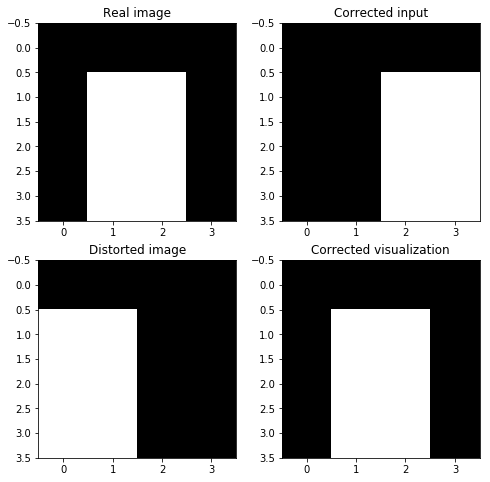

In [147]:
# plt.figure(1)
def vis_matrices(Mr, Mm, Mst, P):
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2) #, squeeze=True, sharey=True)
    fig.set_size_inches(8,8)

    plt.sca(ax1[0])
    plt.imshow(Mr)
    plt.title("Real image")

    plt.sca(ax2[0])
    plt.imshow(Mm)
    plt.title("Distorted image")

    plt.sca(ax1[1])
    plt.imshow(Mst)
    plt.title("Corrected input")

    plt.sca(ax2[1])
    plt.imshow(Mst@P)
    plt.title("Corrected visualization")
vis_matrices(Mreal, Mmang, Mstar, P)

In [225]:
# Define the randomization criteria
# proportions of one and zeros in the random matrices
cut = np.linspace(0.3,0.8,6)
nbpix = 4
nb_per_cut = 100
nb_cut = len(cut)
nb_sample = nb_per_cut*nb_cut

In [221]:
np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cut[5], cut[5]])

array([[1, 1, 1, 0],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 1]])

In [222]:
# generating the dataset
Mreal_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mmang_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mstar_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))

Mreal_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mmang_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mstar_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))

Mreal_list = []
Mmang_list = []
Mstar_list = []
jj = 0
for cc in cut:    
    print(cc)
    ii = 0
    while ii < nb_per_cut:
        temp_Mreal = np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cc, cc])
#         print(temp_Mreal)
#         print(ii)
        Mreal_tab[jj,:] = temp_Mreal.reshape(1,nbpix**2)
        Mmang_tab[jj,:] = (temp_Mreal@P).reshape(1,nbpix**2)
        Mstar_tab[jj,:] = (temp_Mreal@Pstar).reshape(1,nbpix**2)
        Mreal_list.append((temp_Mreal).reshape(1,nbpix**2))
        Mmang_list.append((temp_Mreal@P).reshape(1,nbpix**2))
        Mstar_list.append((temp_Mreal@Pstar).reshape(1,nbpix**2))
        ii += 1
        jj += 1

0.3
0.4
0.5
0.6000000000000001
0.7
0.8


In [227]:
type(Mreal_tab)
Mreal_tab[0]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


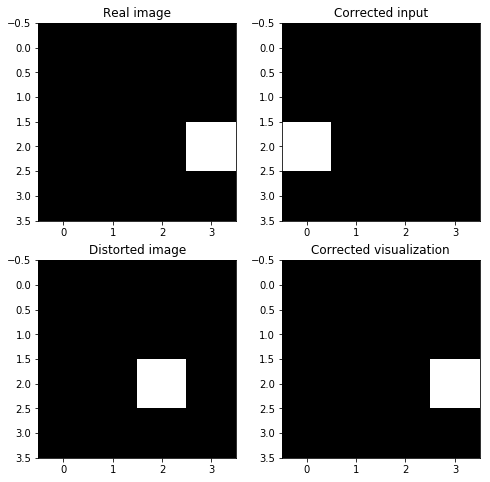

In [241]:
n = 540
print(Mreal_tab[n,:])
vis_matrices(Mreal_tab[n,:].reshape(nbpix,nbpix), Mmang_tab[n,:].reshape(nbpix,nbpix), Mstar_tab[n,:].reshape(nbpix,nbpix), P)

In [223]:
data = pd.DataFrame({"real":Mreal_list,
                    "mang": Mmang_list,
                    "star": Mstar_list})
data.head()
data.count()

real    600
mang    600
star    600
dtype: int64

In [243]:
train_idx = np.sort(random.sample(range(1, nb_sample), round(0.7*nb_sample)))

X_train = Mreal_tab[train_idx]
X_test = np.delete(Mreal_tab, train_idx, 0)

y_train = Mstar_tab[train_idx]
y_test =np.delete(Mstar_tab, train_idx, 0)


print(X_train.shape)
print(X_test.shape)

# df2 = data.drop_duplicates()
# df2.count()
vis_matrices(X_train[n,:].reshape(nbpix,nbpix), X_train[n,:].reshape(nbpix,nbpix)@P, y_train[n,:].reshape(nbpix,nbpix), P)

(420, 16)
(180, 16)


IndexError: index 540 is out of bounds for axis 0 with size 420

In [165]:
# df_train = data.sample(0.8)
# df_test = data.sample(2000)
